<a href="https://colab.research.google.com/github/Eswar-11/Machine_Learning/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Decision Tree ID3 Algorithm on PlayTennis Dataset**

In [1]:
import numpy as np
import pandas as pd
eps = np.finfo(float).eps
from numpy import log2 as log

In [2]:
df = pd.read_csv('/PlayTennis.csv')
df

,Outlook,Temperature,Humidity,Wind,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


### Calculate entropy of whole dataset

In [3]:
##1. calculate entropy o the whole dataset

entropy_node = 0  #Initialize Entropy
values = df.Play.unique()  #Unique objects - 'Yes', 'No'
for value in values:
    fraction = df.Play.value_counts()[value]/len(df.Play)  
    entropy_node += -fraction*np.log2(fraction)

print(f'Values: {values}')
print(f'entropy_node: {entropy_node}')      

Values: ['No' 'Yes']
entropy_node: 0.9402859586706309


## calculate entropy of each attribute

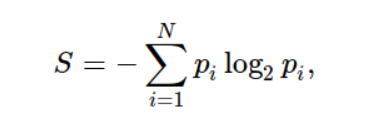

In [4]:
def ent(df,attribute):
    target_variables = df.Play.unique()  #This gives all 'Yes' and 'No'
    variables = df[attribute].unique()    #This gives different features in that attribute (like 'Sweet')


    entropy_attribute = 0
    for variable in variables:
        entropy_each_feature = 0
        for target_variable in target_variables:
            num = len(df[attribute][df[attribute]==variable][df.Play ==target_variable]) #numerator
            den = len(df[attribute][df[attribute]==variable])  #denominator
            fraction = num/(den+eps)  #pi
            entropy_each_feature += -fraction*log(fraction+eps) #This calculates entropy for one feature like 'Sweet'
        fraction2 = den/len(df)
        entropy_attribute += -fraction2*entropy_each_feature   #Sums up all the entropy ETaste

    return(abs(entropy_attribute))

In [5]:
a_entropy = {k:ent(df,k) for k in df.keys()[:-1]}
a_entropy

{'Humidity': 0.7884504573082889,
 'Outlook': 0.6935361388961914,
 'Temperature': 0.9110633930116756,
 'Wind': 0.892158928262361}

## Calculate Info gain of each attribute :
### IG(attr) = entropy of dataset - entropy of attribute

In [6]:
def ig(e_dataset,e_attr):
    return(e_dataset-e_attr)

In [7]:
#entropy_node = entropy of dataset
#a_entropy[k] = entropy of k(th) attr
IG = {k:ig(entropy_node,a_entropy[k]) for k in a_entropy}
IG

{'Humidity': 0.15183550136234203,
 'Outlook': 0.24674981977443955,
 'Temperature': 0.029222565658955313,
 'Wind': 0.04812703040826993}

## Decision tree

In [8]:
def find_entropy(df):
    Class = df.keys()[-1]   #To make the code generic, changing target variable class name
    entropy = 0
    values = df[Class].unique()
    for value in values:
        fraction = df[Class].value_counts()[value]/len(df[Class])
        entropy += -fraction*np.log2(fraction)
    return entropy
  
  
def find_entropy_attribute(df,attribute):
  Class = df.keys()[-1]   #To make the code generic, changing target variable class name
  target_variables = df[Class].unique()  #This gives all 'Yes' and 'No'
  variables = df[attribute].unique()    #This gives different features in that attribute (like 'Hot','Cold' in Temperature)
  entropy2 = 0
  for variable in variables:
      entropy = 0
      for target_variable in target_variables:
          num = len(df[attribute][df[attribute]==variable][df[Class] ==target_variable])
          den = len(df[attribute][df[attribute]==variable])
          fraction = num/(den+eps)
          entropy += -fraction*log(fraction+eps)
      fraction2 = den/len(df)
      entropy2 += -fraction2*entropy
  return abs(entropy2)


def find_winner(df):
    Entropy_att = []
    IG = []
    for key in df.keys()[:-1]:
#         Entropy_att.append(find_entropy_attribute(df,key))
        IG.append(find_entropy(df)-find_entropy_attribute(df,key))
    return df.keys()[:-1][np.argmax(IG)]
  
  
def get_subtable(df, node,value):
  return df[df[node] == value].reset_index(drop=True)


def buildTree(df,tree=None): 
    Class = df.keys()[-1]   #To make the code generic, changing target variable class name
    
    #Here we build our decision tree

    #Get attribute with maximum information gain
    node = find_winner(df)
    
    #Get distinct value of that attribute e.g Salary is node and Low,Med and High are values
    attValue = np.unique(df[node])
    
    #Create an empty dictionary to create tree    
    if tree is None:                    
        tree={}
        tree[node] = {}
    
   #We make loop to construct a tree by calling this function recursively. 
    #In this we check if the subset is pure and stops if it is pure. 

    for value in attValue:
        
        subtable = get_subtable(df,node,value)
        clValue,counts = np.unique(subtable[Class],return_counts=True)                        
        
        if len(counts)==1:#Checking purity of subset
            tree[node][value] = clValue[0]                                                    
        else:        
            tree[node][value] = buildTree(subtable) #Calling the function recursively 
                   
    return tree
  

In [9]:
t  = buildTree(df)
import pprint
pprint.pprint(t)

{'Outlook': {'Overcast': 'Yes',
             'Rain': {'Wind': {'Strong': 'No', 'Weak': 'Yes'}},
             'Sunny': {'Humidity': {'High': 'No', 'Normal': 'Yes'}}}}
